# Optymalizacja Wielokryterialna: Ćw.2 - Optymalizacja wielokryterialna dyskretna
Data: 21.10.2024r.  
Zespół: Krzysztof Kordal, Jakub Szczypek

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

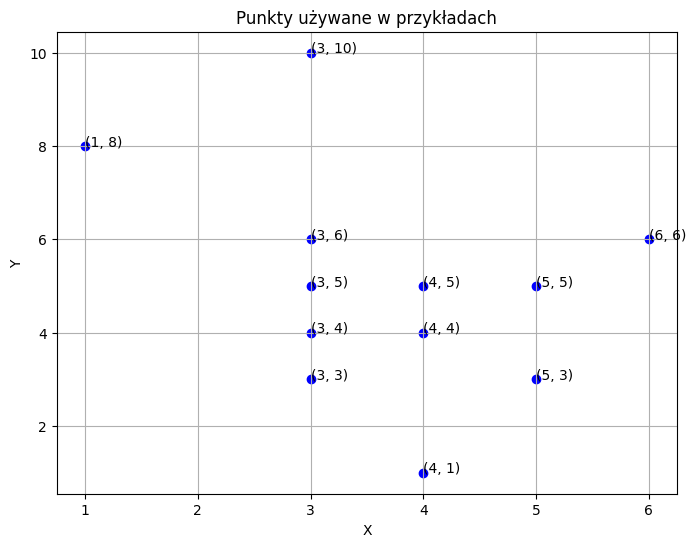

In [2]:
# Given points
points = [(5, 5), (3, 6), (4, 4), (5, 3), (3, 3), (1, 8), (3, 4), (4, 5), (3, 10), (6, 6), (4, 1), (3, 5)]

# Extracting x and y coordinates
x_coords, y_coords = zip(*points)

# Plotting the points
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, c='blue', marker='o')

# Adding labels and title
for point in points:
    plt.annotate(f"{point}", (point[0], point[1]))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Punkty używane w przykładach')

# Display the plot
plt.grid(True)
plt.show()


In [3]:
# Class for comparing x<=y with counting
class ComparisonCounter:
    def __init__(self):
        self.comparison_count_points = 0
        self.comparison_count_coords = 0

    # less or equal (<=)
    def le(self, x, y):
        self.comparison_count_coords += 1
        return x <= y

## 1. Algorytm naiwny bez filtracji:

In [4]:
def naive_nondominated_sort(X):
    n = len(X)
    P = []
    dominated = [False] * n  # Tablica śledząca, czy punkt został zdominowany

    comp_cnt = ComparisonCounter()

    for i in range(n):
        if dominated[i]:
            continue  # Jeśli punkt jest już zdominowany, pomijamy go
        Y = X[i]
        for j in range(n):
            if i == j or dominated[j]:
                continue

            comp_cnt.comparison_count_points += 1

            # print(f"Iter ({i}, {j}) | Y={Y} Xj={X[j]}")
            if (comp_cnt.le(Y[0], X[j][0]) and
                comp_cnt.le(Y[1], X[j][1])):
                # Y dominuje X[j]
                # print(f"Del Xj! | Y{Y} <= Xj{X[j]}")
                dominated[j] = True
            elif (comp_cnt.le(X[j][0], Y[0]) and
                  comp_cnt.le(X[j][1], Y[1])):
                # X[j] dominuje Y
                # print(f"Del Y! | Xj{X[j]} <= Y{Y}")
                dominated[i] = True
                break  # Nie ma sensu dalej sprawdzać, Y jest zdominowany
        if not dominated[i]:
            P.append(Y)  # Dodajemy Y do listy punktów niezdominowanych

    return P, comp_cnt.comparison_count_points, comp_cnt.comparison_count_coords

# Przykładowe dane
X = [(5,5), (3,6), (4,4), (5,3), (3,3), (1,8), (3,4), (4,5), (3,10), (6,6), (4,1), (3,5)]

# Uruchomienie algorytmu
start = time.time()
P, comparison_count, coordinate_comparison_count = naive_nondominated_sort(X)
stop = time.time()

print("Punkty niezdominowane P(X):")
for point in P:
    print(point)
print(f"Porównania pary punktów: {comparison_count}")
print(f"Porównania pary współrzędnych: {coordinate_comparison_count}")
print(f"Czas: {(stop-start) * 10**3:.3f} [ms]")

Punkty niezdominowane P(X):
(3, 3)
(1, 8)
(4, 1)
Porównania pary punktów: 19
Porównania pary współrzędnych: 53
Czas: 0.168 [ms]


## 2. Algorytm naiwny z filtracją punktow zdominowanych:

In [5]:
def nondominated_sort_with_filtering(X):
    P = []  # Lista punktów niezdominowanych
    X_list = X.copy()  # Kopia listy X, aby nie modyfikować oryginału

    comp_cnt = ComparisonCounter()

    while len(X_list) > 0:
        Y = X_list[0]  # Wybieramy pierwszy punkt z listy
        i = 1
        while i < len(X_list):
            X_j = X_list[i]
            comp_cnt.comparison_count_points += 1

            # Sprawdzenie czy Y dominuje X_j
            if (comp_cnt.le(Y[0], X_j[0]) and
                comp_cnt.le(Y[1], X_j[1])):
                # Y dominuje X_j
                X_list.pop(i)
            elif (comp_cnt.le(X_j[0], Y[0]) and
                  comp_cnt.le(X_j[1], Y[1])):
                # X_j dominuje Y
                X_list.pop(0)  # Usuwamy Y
                Y = X_j  # Aktualizujemy Y
                i = 1  # Resetujemy i, bo lista się zmieniła
            else:
                i += 1

        # Dodajemy Y do listy punktów niezdominowanych
        P.append(Y)
        # Filtracja: usuwamy z X_list wszystkie punkty zdominowane przez Y
        i = 0
        while i < len(X_list):
            point = X_list[i]
            # Sprawdzanie, czy Y dominuje point
            comp_cnt.comparison_count_points += 1
            if (comp_cnt.le(Y[0], point[0]) and
                comp_cnt.le(Y[1], point[1])):
                X_list.pop(i)
            else:
                i += 1

        # X_list = [point for point in X_list if not ((Y[0] <= point[0] and Y[1] <= point[1]) )] #and (Y[0] < point[0] or Y[1] < point[1]))]
        # Usuwamy Y z X_list
        if Y in X_list:
            X_list.remove(Y)
        # Sprawdzamy, czy w X_list został tylko jeden punkt
        if len(X_list) == 1:
            P.append(X_list[0])
            break
    return P, comp_cnt.comparison_count_points, comp_cnt.comparison_count_coords

# Przykładowe dane
X = [(5,5), (3,6), (4,4), (5,3), (3,3), (1,8), (3,4), (4,5), (3,10), (6,6), (4,1), (3,5)]

# Uruchomienie algorytmu
start = time.time()
P, comparison_count, coordinate_comparison_count = nondominated_sort_with_filtering(X)
stop = time.time()

print("Punkty niezdominowane P(X):")
for point in P:
    print(point)
print(f"Porównania pary punktów: {comparison_count}")
print(f"Porównania pary współrzędnych: {coordinate_comparison_count}")
print(f"Czas: {(stop-start) * 10**3:.3f} [ms]")


Punkty niezdominowane P(X):
(3, 3)
(1, 8)
(4, 1)
Porównania pary punktów: 19
Porównania pary współrzędnych: 44
Czas: 0.176 [ms]


### 2.1. Przykład błędnego wyniku w przypadku usunięcia $X(i)$ i pominięcia filtracji

In [6]:
def naive_nondominated_sort_without_filtering(X):
    n = len(X)
    P = []
    X_list = X.copy()

    comp_cnt = ComparisonCounter()

    i = 0
    while i < len(X_list):
        Y = X_list[i]
        is_dominated = False
        for j in range(len(X_list)):
            if i == j:
                continue
            comp_cnt.comparison_count_points += 1
            if (comp_cnt.le(X_list[j][0], Y[0]) and
                comp_cnt.le(X_list[j][1], Y[1])):
                # X_list[j] dominuje Y
                is_dominated = True
                break
        if not is_dominated:
            P.append(Y)
        # Usuwamy Y z listy, ale nie filtrujemy zdominowanych punktów
        X_list.pop(i)
    return P, comp_cnt.comparison_count_points, comp_cnt.comparison_count_coords

# Uruchomienie algorytmu
start = time.time()
P, comparison_count, coordinate_comparison_count = naive_nondominated_sort_without_filtering(X)
stop = time.time()

print("Punkty niezdominowane P(X):")
for point in P:
    print(point)
print(f"Porównania pary punktów: {comparison_count}")
print(f"Porównania pary współrzędnych: {coordinate_comparison_count}")
print(f"Czas: {(stop-start) * 10**3:.3f} [ms]")

Punkty niezdominowane P(X):
(3, 3)
(1, 8)
(3, 4)
(4, 1)
(3, 5)
Porównania pary punktów: 34
Porównania pary współrzędnych: 50
Czas: 0.173 [ms]


## 3. Algorytm naiwny oparty o punkt idealny (szkic):

In [7]:
import time

def calculate_ideal_point(X):
    k = len(X[0])  # Wymiar przestrzeni
    xmin = [min(point[i] for point in X) for i in range(k)]
    return xmin

def calculate_distances(X, xmin):
    distances = []
    for idx, point in enumerate(X):
        dist = sum((point[i] - xmin[i]) ** 2 for i in range(len(xmin)))
        distances.append((dist, idx))
    return distances

def ideal_point_algorithm(X):
    P = []  # Lista punktów niezdominowanych
    X_set = set(X)  # Zbiór punktów do przetworzenia

    comp_cnt = ComparisonCounter()

    xmin = calculate_ideal_point(X)

    # Obliczanie odległości do punktu idealnego
    distances = calculate_distances(X, xmin)

    # Sortowanie punktów według odległości od punktu idealnego
    distances.sort()
    sorted_points = [X[idx] for dist, idx in distances]

    for current_point in sorted_points:
        if current_point not in X_set:
            continue  # Punkt został już usunięty
        # Usuwanie zdominowanych punktów przez current_point
        dominated_points = set()
        for point in X_set:
            if point != current_point:
                comp_cnt.comparison_count_points += 1
                if (comp_cnt.le(current_point[0], point[0]) and
                    comp_cnt.le(current_point[1], point[1])):
                    dominated_points.add(point)
        X_set -= dominated_points
        # Dodawanie current_point do P
        if current_point not in P:
            P.append(current_point)
        # Usuwanie current_point z X_set
        X_set.remove(current_point)
        # Sprawdzenie liczby pozostałych punktów
        if len(X_set) == 1:
            remaining_point = next(iter(X_set))
            if remaining_point not in P:
                P.append(remaining_point)
            break
    return P, comp_cnt.comparison_count_points, comp_cnt.comparison_count_coords

# Przykładowe dane
X = [(5,5), (3,6), (4,4), (5,3), (3,3), (1,8), (3,4), (4,5), (3,10), (6,6), (4,1), (3,5)]

# Uruchomienie algorytmu
start_time = time.time()
P, comparison_count, coordinate_comparison_count = ideal_point_algorithm(X)
end_time = time.time()

# Wyświetlanie wyników
print("Punkty niezdominowane P(X):")
for point in P:
    print(point)

print(f"Porównania pary punktów: {comparison_count}")
print(f"Porównania pary współrzędnych: {coordinate_comparison_count}")
print(f"Czas: {(end_time - start_time) * 10**3:.3f} ms")


Punkty niezdominowane P(X):
(3, 3)
(4, 1)
(1, 8)
Porównania pary punktów: 12
Porównania pary współrzędnych: 22
Czas: 0.261 ms


## Porównanie algorytmów:

| Algorytm                                   | Liczba porównań<br>par punktów | Liczba porównań<br>par współrzędnych | Czas obliczeń [ms] |
|--------------------------------------------|:------------------------------:|:------------------------------------:|-------------------:|
| 1. Naiwny bez filtracji                    | 19                             |                                   53 |              0.168 |
| 2. Naiwny z filtracją pkt-ów zdominowanych |                             19 |                                   44 |              0.176 |
| 3. Naiwny oparty o punkt idealny           |                             12 |                                   22 |              0.261 |